In [ ]:
import pandas as pd
import glob
import os

# Ścieżka do folderu z plikami CSV
folder_path = 'results1'  # <- zmień na swoją ścieżkę
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Lista do przechowywania danych
dataframes = []

# Wczytaj każdy plik CSV i dodaj do listy
for file in all_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Połącz wszystkie dane w jeden DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Oblicz średnią execution_time_sec dla unikalnych kombinacji
average_df = combined_df.groupby(
    ['schedule', 'chunk_size', 'array_size', 'threads']
)['execution_time_sec'].mean().reset_index()

# Opcjonalnie: zapisz wynik do pliku
average_df.to_csv('średnie_wyniki_1.csv', index=False)

print(average_df)


   schedule  chunk_size  array_size  threads  execution_time_sec
0      auto           4   100000000        1            0.566176
1      auto           4   100000000        2            0.283549
2      auto           4   100000000        3            0.189486
3      auto           4   100000000        4            0.142932
4      auto           4   100000000        5            0.114977
..      ...         ...         ...      ...                 ...
91   static          32   100000000        8            0.565449
92   static          32   100000000        9            0.565923
93   static          32   100000000       10            0.565113
94   static          32   100000000       11            0.565472
95   static          32   100000000       12            0.565752

[96 rows x 5 columns]


In [ ]:
df1 = pd.read_csv('średnie_wyniki_1.csv')

df1.head()

,schedule,chunk_size,array_size,threads,execution_time_sec
0,auto,4,100000000,1,0.566176
1,auto,4,100000000,2,0.283549
2,auto,4,100000000,3,0.189486
3,auto,4,100000000,4,0.142932
4,auto,4,100000000,5,0.114977


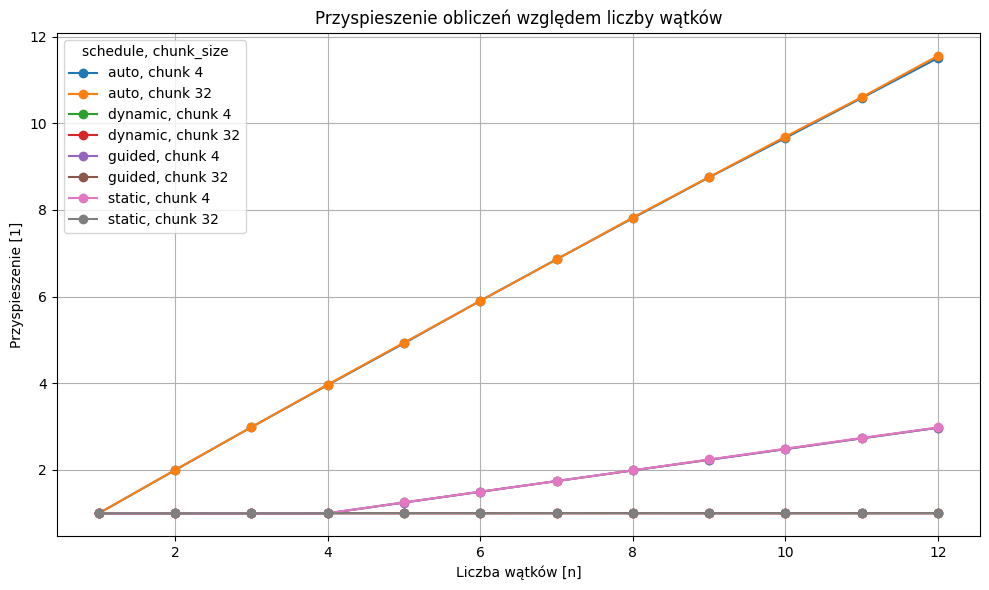

In [ ]:
import matplotlib.pyplot as plt
# Grupujemy dane po schedule i chunk_size
grouped = df1.groupby(['schedule', 'chunk_size'])


# Tworzymy wykres
plt.figure(figsize=(10, 6))

for (schedule, chunk_size), group in grouped:

    # print(schedule, chunk_size)
    group = group.sort_values('threads')
    # print(group.head(12))
    # Czas dla jednego wątku jako punkt odniesienia (dla tej samej kombinacji)
    base_time = group[group['threads'] == 1]['execution_time_sec'].values[0]

    # Obliczamy przyspieszenie
    speedup = base_time / group['execution_time_sec']

    label = f'{schedule}, chunk {chunk_size}'
    plt.plot(group['threads'], speedup, marker='o', label=label)

# Opis wykresu
plt.title('Przyspieszenie obliczeń względem liczby wątków')
plt.xlabel('Liczba wątków [n]')
plt.ylabel('Przyspieszenie [1]')
plt.legend(title='schedule, chunk_size')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
filter_df1 = df1[df1['threads'] == max(df1['threads'])]
filter_df1

   schedule  chunk_size  array_size  threads  execution_time_sec
11     auto           4   100000000       12            0.049199
23     auto          32   100000000       12            0.049007
35  dynamic           4   100000000       12            0.190040
47  dynamic          32   100000000       12            0.565414
59   guided           4   100000000       12            0.190078
71   guided          32   100000000       12            0.565364
83   static           4   100000000       12            0.190069
95   static          32   100000000       12            0.565752


,schedule,chunk_size,array_size,threads,execution_time_sec
11,auto,4,100000000,12,0.049199
23,auto,32,100000000,12,0.049007
35,dynamic,4,100000000,12,0.190040
47,dynamic,32,100000000,12,0.565414
59,guided,4,100000000,12,0.190078
71,guided,32,100000000,12,0.565364
83,static,4,100000000,12,0.190069
95,static,32,100000000,12,0.565752


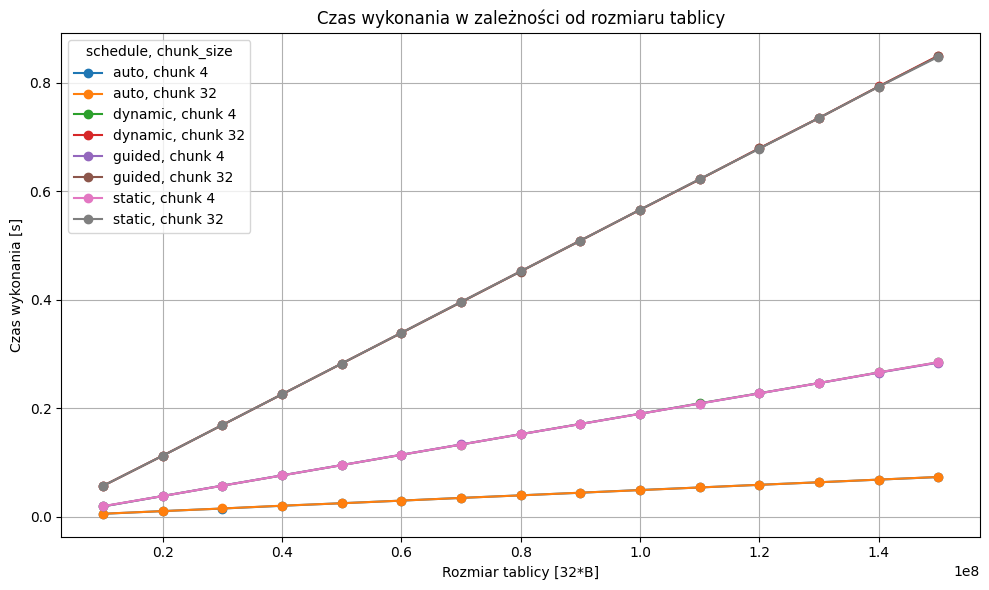

In [ ]:
df2 = pd.read_csv('średnie_wyniki_2.csv')

grouped = df2.groupby(['schedule', 'chunk_size'])
# Tworzymy wykres
plt.figure(figsize=(10, 6))

for (schedule, chunk_size), group in grouped:

    # print(schedule, chunk_size)
    group = group.sort_values('problem_size')
    # print(group.head(12))

    label = f'{schedule}, chunk {chunk_size}'
    plt.plot(group['problem_size'], group['execution_time_sec'], marker='o', label=label)

# Opis wykresu
plt.title('Czas wykonania w zależności od rozmiaru tablicy')
plt.xlabel('Rozmiar tablicy [32*B]')
plt.ylabel('Czas wykonania [s]')
plt.legend(title='schedule, chunk_size')
plt.grid(True)
plt.tight_layout()
plt.show()

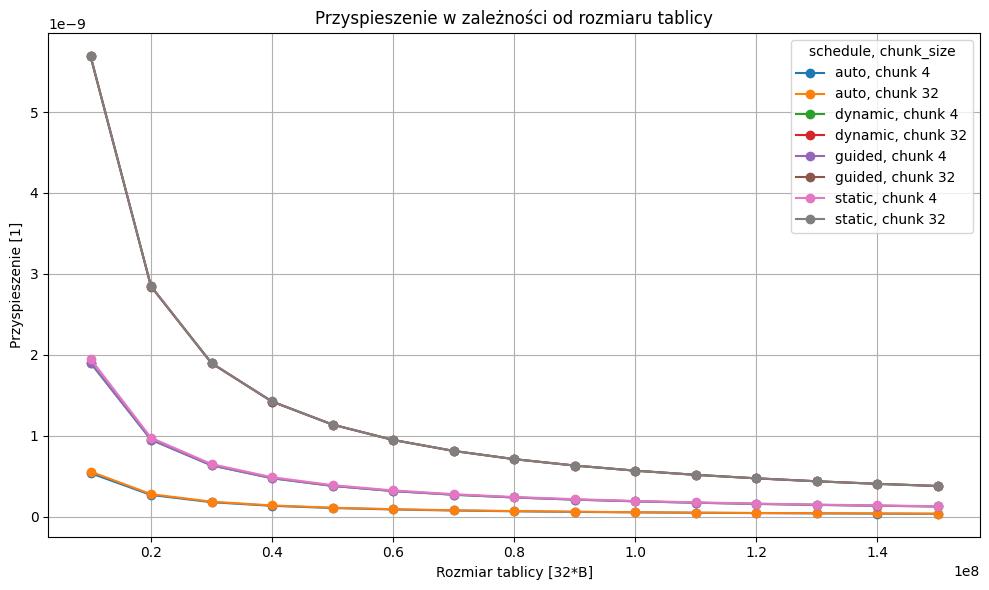

In [ ]:
# plt.figure(figsize=(10, 6))

# for (schedule, chunk_size), group in grouped:

#     # print(schedule, chunk_size)
#     group = group.sort_values('problem_size')
#     # print(group.head(12))
#     base_time = group[group['problem_size'] == min(df2['problem_size'])]['execution_time_sec'].values[0]

#     # Obliczamy przyspieszenie
#     speedup = base_time / group['problem_size']
#     label = f'{schedule}, chunk {chunk_size}'
#     plt.plot(group['problem_size'], speedup, marker='o', label=label)

# # Opis wykresu
# plt.title('Przyspieszenie w zależności od rozmiaru tablicy')
# plt.xlabel('Rozmiar tablicy [32*B]')
# plt.ylabel('Przyspieszenie [1]')
# plt.legend(title='schedule, chunk_size')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [ ]:
filter_df2 = df2[df2['problem_size'] == max(df2['problem_size'])]
filter_df2

,schedule,chunk_size,problem_size,threads,execution_time_sec
14,auto,4,150000000,12,0.073151
29,auto,32,150000000,12,0.073270
44,dynamic,4,150000000,12,0.284512
59,dynamic,32,150000000,12,0.849502
74,guided,4,150000000,12,0.283933
89,guided,32,150000000,12,0.848865
104,static,4,150000000,12,0.284786
119,static,32,150000000,12,0.847592


In [ ]:
import pandas as pd
import os

def wczytaj_csv_plik(file_path: str) -> pd.DataFrame:

    if not os.path.isfile(file_path):
        raise FileNotFoundError(f"Plik nie istnieje: {file_path}")

    df = pd.read_csv(file_path)
    return df


In [ ]:
df1 = wczytaj_csv_plik("zad3_csv_vals.csv")
df1.head()

,calculated_action,schedule,chunk_size,array_size,threads,execution_time_sec,buckets_amount
0,benchmark,static,2,10000000,1,0.057224,1000
1,distribution_merge,static,2,10000000,1,0.251707,1000
2,sort,static,2,10000000,1,1.142774,1000
3,rewrite,static,2,10000000,1,0.041134,1000
4,whole_algorithm,static,2,10000000,1,1.534810,1000


In [ ]:
df2 = wczytaj_csv_plik("zad4_csv_vals.csv")
df2.head()

,calculated_action,schedule,chunk_size,array_size,threads,execution_time_sec,buckets_amount
0,benchmark,static,2,10000000,1,0.059340,1000
1,distribution,static,2,10000000,1,0.208110,1000
2,sort,static,2,10000000,1,1.170743,1000
3,rewrite,static,2,10000000,1,0.020120,1000
4,whole_algorithm,static,2,10000000,1,1.501767,1000


In [ ]:
def print_unique_values(df: pd.DataFrame):
  for column in df.columns:
      if column == "execution_time_sec": continue
      print(f"\nKolumna: {column}")
      print(df[column].unique())

In [ ]:
print("-> df1")
print_unique_values(df1)
print("-> df2")
print_unique_values(df2)

-> df1

Kolumna: calculated_action
['benchmark' 'distribution_merge' 'sort' 'rewrite' 'whole_algorithm']

Kolumna: schedule
['static']

Kolumna: chunk_size
[2]

Kolumna: array_size
[ 10000000  20000000  30000000  40000000  50000000  60000000  70000000
  80000000  90000000 100000000]

Kolumna: threads
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]

Kolumna: buckets_amount
[1000]
-> df2

Kolumna: calculated_action
['benchmark' 'distribution' 'sort' 'rewrite' 'whole_algorithm']

Kolumna: schedule
['static']

Kolumna: chunk_size
[2]

Kolumna: array_size
[ 10000000  20000000  30000000  40000000  50000000  60000000  70000000
  80000000  90000000 100000000]

Kolumna: threads
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]

Kolumna: buckets_amount
[1000]


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def wykres_rozmiaru__tablicy(df: pd.DataFrame, numer: int):
    df_seq = df[(df['threads'] == 1) & (df['buckets_amount'] == 1000)]

    plt.figure(figsize=(10, 6))
    for action in df_seq['calculated_action'].unique():
        sub = df_seq[df_seq['calculated_action'] == action]
        plt.plot(sub['array_size'], sub['execution_time_sec'], label=action, marker='o')

    plt.title(f'Czas działania vs array_size\n(alg. sekwencyjny, bucket_amount=1000, algorytm numer: {numer})')
    plt.xlabel('Wielkość tablicy (array_size)')
    plt.ylabel('Czas wykonania (s)')
    plt.legend(title='calculated_action')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


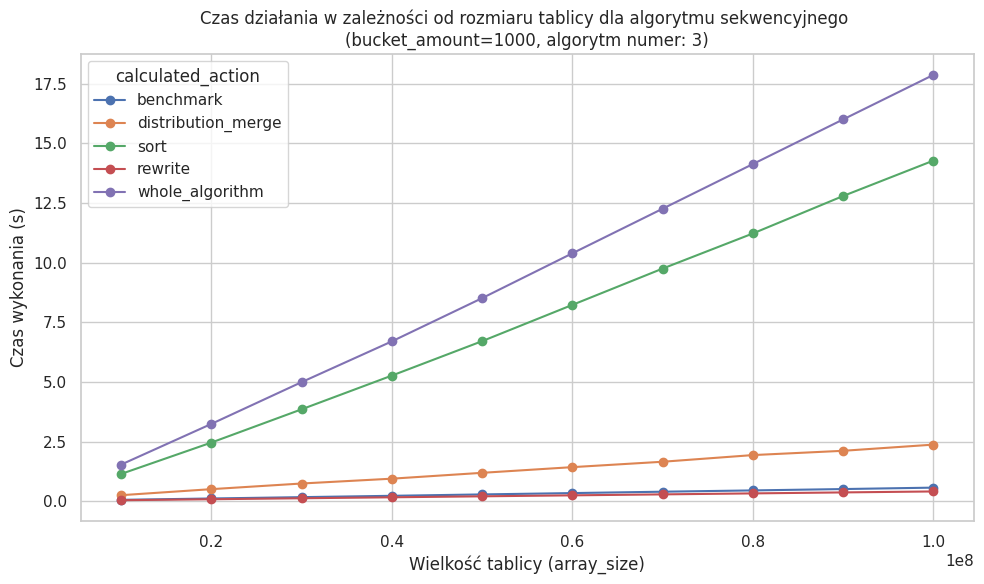

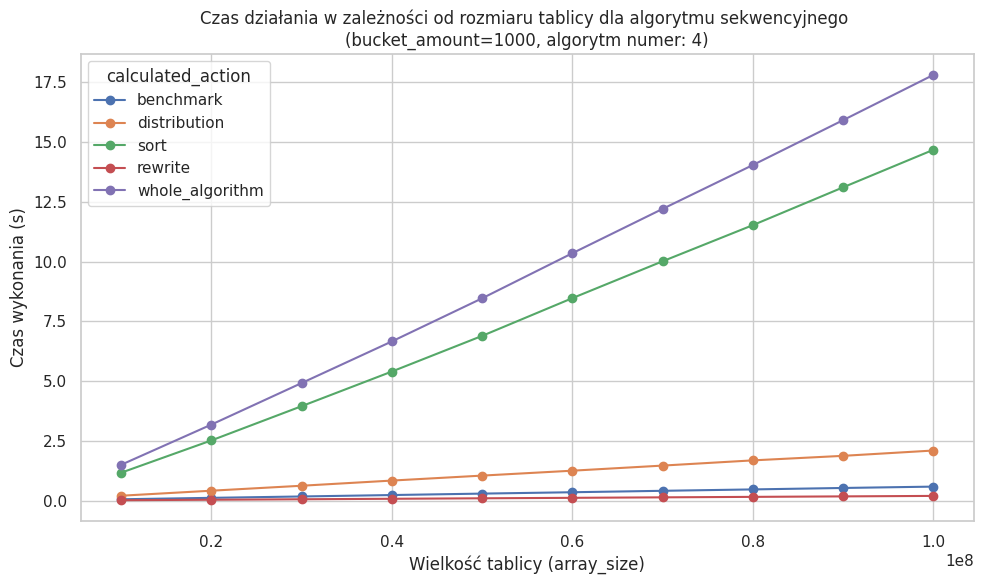

In [ ]:
wykres_rozmiaru_tablicy(df1, numer=3)
wykres_rozmiaru_tablicy(df2, numer=4)

In [ ]:
def wykres_rozmiaru_tablicy_comp(df1: pd.DataFrame, df2: pd.DataFrame, numer1: int, numer2: int):
    max_buckets_amount1 = df1['buckets_amount'].max()
    max_buckets_amount2 = df2['buckets_amount'].max()

    # Filtrowanie danych dla obu algorytmów
    df_seq1 = df1[(df1['threads'] == 1) & (df1['buckets_amount'] == max_buckets_amount1)]
    df_seq2 = df2[(df2['threads'] == 1) & (df2['buckets_amount'] == max_buckets_amount2)]

    # Tworzenie wykresu
    plt.figure(figsize=(10, 6))

    # Wykres dla pierwszego algorytmu
    for action in df_seq1['calculated_action'].unique():
        sub1 = df_seq1[df_seq1['calculated_action'] == action]
        plt.plot(sub1['array_size'], sub1['execution_time_sec'], label=f'{action} - Alg {numer1}', marker='o')

    # Wykres dla drugiego algorytmu
    for action in df_seq2['calculated_action'].unique():
        sub2 = df_seq2[df_seq2['calculated_action'] == action]
        plt.plot(sub2['array_size'], sub2['execution_time_sec'], label=f'{action} - Alg {numer2}', marker='x', markersize=10, markeredgewidth=2)

    # Ustawienia wykresu
    plt.title(f'Porównanie czasu działania w zależności od rozmiaru tablicy dla różnych algorytmów\n'
              f'(bucket_amount1={max_buckets_amount1}, bucket_amount2={max_buckets_amount2})')
    plt.xlabel('Wielkość tablicy (array_size)')
    plt.ylabel('Czas wykonania (s)')
    plt.legend(title='calculated_action')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



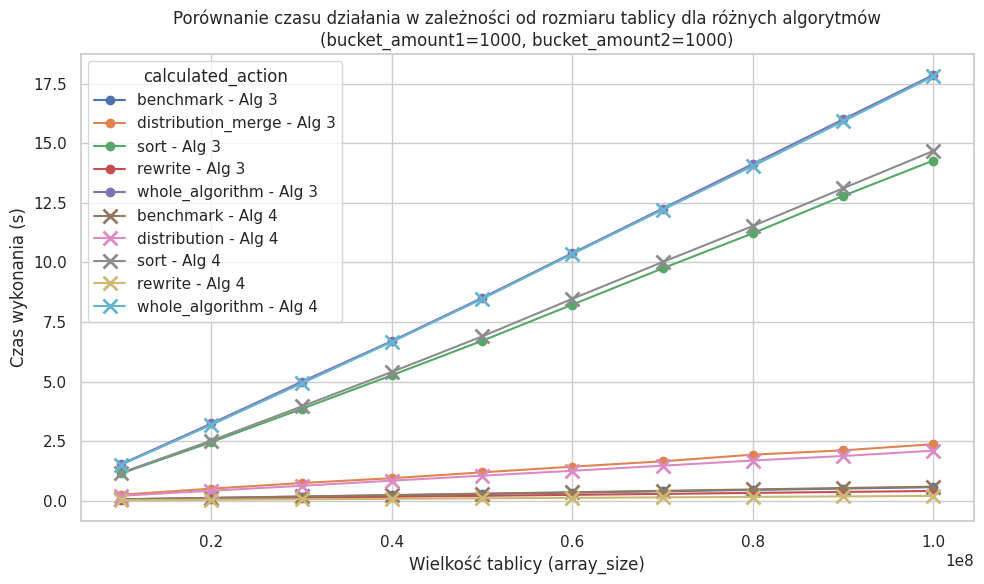

In [ ]:
wykres_rozmiaru_tablicy_comp(df1, df2, numer1=3, numer2=4)


In [ ]:
df1_b = wczytaj_csv_plik("zad3_b_csv_vals.csv")
df2_b = wczytaj_csv_plik("zad4_b_csv_vals.csv")

In [ ]:
print("-> df1_b")
print_unique_values(df1_b)
print("-> df2_b")
print_unique_values(df2_b)

-> df1_b

Kolumna: calculated_action
['benchmark' 'distribution_merge' 'sort' 'rewrite' 'whole_algorithm']

Kolumna: schedule
['static']

Kolumna: chunk_size
[2]

Kolumna: array_size
[100000000]

Kolumna: threads
[1]

Kolumna: buckets_amount
[ 1000  2000  3000  4000  5000  6000  7000  8000  9000 10000]
-> df2_b

Kolumna: calculated_action
['benchmark' 'distribution' 'sort' 'rewrite' 'whole_algorithm']

Kolumna: schedule
['static']

Kolumna: chunk_size
[2]

Kolumna: array_size
[100000000]

Kolumna: threads
[1]

Kolumna: buckets_amount
[1000 2000 3000 4000 5000 6000 7000]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def wykres_od_kubelkow(df: pd.DataFrame, numer: int, array_size: int = None, threads: int = 1):
    # Ustaw domyślny array_size na największy dostępny, jeśli nie podano
    if array_size is None:
        array_size = df['array_size'].max()

    # Filtrowanie danych zgodnie z parametrami
    df_buckets = df[(df['threads'] == threads) & (df['array_size'] == array_size)]

    # Sprawdzenie, czy 'calculated_action' zawiera unikalne wartości
    actions = df_buckets['calculated_action'].unique()
    if len(actions) == 0:
        print("Brak unikalnych akcji w filtrze danych. Sprawdź dane wejściowe.")
        return

    # Rysowanie wykresu
    plt.figure(figsize=(10, 6))
    for action in actions:
        sub = df_buckets[df_buckets['calculated_action'] == action]
        if len(sub) > 0:  # Tylko rysowanie, jeśli są dane
            plt.plot(sub['buckets_amount'], sub['execution_time_sec'], label=action, marker='o')

    plt.title(f'Czas działania w zależności od liczby kubełków dla algorytmu sekwencyjnego\n(array_size = {array_size}, algorytm numer: {numer})')
    plt.xlabel('Liczba kubełków (bucket_amount)')
    plt.ylabel('Czas wykonania (s)')

    # Sprawdzenie, czy są dane do legendy
    if plt.gca().get_legend_handles_labels()[0]:
        plt.legend(title='calculated_action')
    else:
        print("Brak danych do wyświetlenia w legendzie.")

    plt.grid(True)
    plt.tight_layout()
    plt.show()


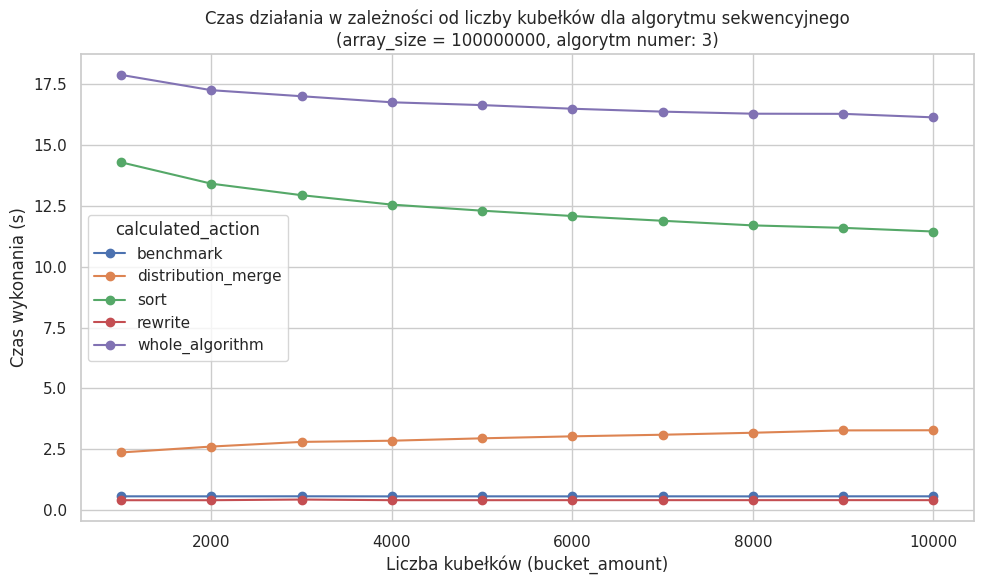

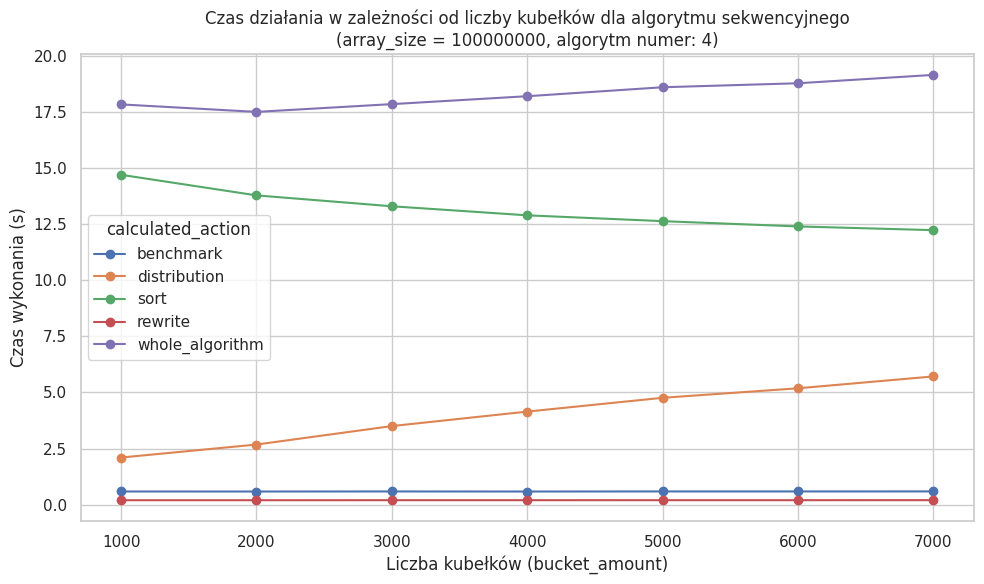

In [ ]:
wykres_od_kubelkow(df1_b, numer=3)
wykres_od_kubelkow(df2_b, numer=4)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def polaczony_wykres_od_kubelkow(df_list: list, numer_list: list, array_size: int = None, threads: int = 1):
    plt.figure(figsize=(12, 7))
    markery = ['x', 'o']  # znaczniki dla kolejnych datasetów

    for idx, (df, numer) in enumerate(zip(df_list, numer_list)):
        local_array_size = array_size if array_size is not None else df['array_size'].max()
        array_size =df['array_size'].max()
        # Filtrowanie danych
        df_buckets = df[
            (df['threads'] == threads) &
            (df['array_size'] == local_array_size) &
            (df['buckets_amount'] <= 7000)
        ]

        actions = df_buckets['calculated_action'].unique()

        for action in actions:
            sub = df_buckets[df_buckets['calculated_action'] == action]
            if len(sub) > 0:
                label = f"{action} (alg {numer})"
                plt.plot(
                    sub['buckets_amount'],
                    sub['execution_time_sec'],
                    label=label,
                    marker=markery[idx % len(markery)]
                )

    plt.title(f'Czas działania vs liczba kubełków (≤ 7000, array_size = {array_size})')
    plt.xlabel('Liczba kubełków (bucket_amount)')
    plt.ylabel('Czas wykonania (s)')

    if plt.gca().get_legend_handles_labels()[0]:
        plt.legend(title='calculated_action + algorytm')
    else:
        print("Brak danych do wyświetlenia w legendzie.")

    plt.grid(True)
    plt.tight_layout()
    plt.show()


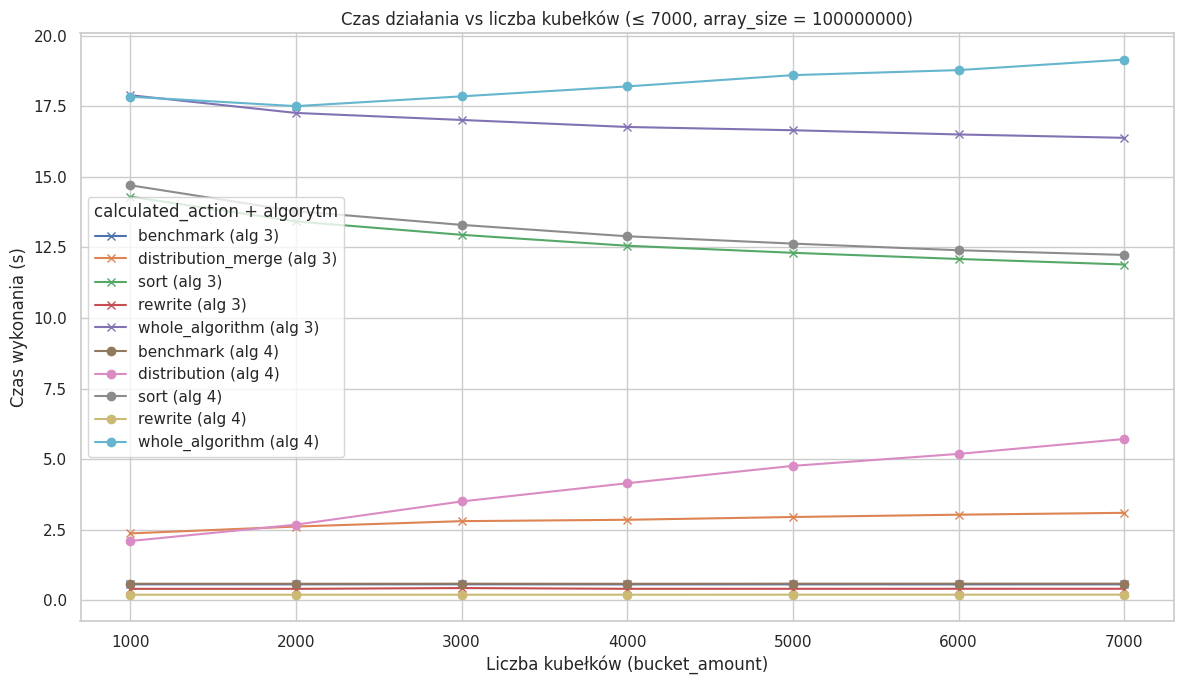

In [ ]:
polaczony_wykres_od_kubelkow([df1_b, df2_b], [3, 4])


In [ ]:
import seaborn as sns

def wykres_dzialania_akcji(df: pd.DataFrame, numer: int):
    max_array_size = df['array_size'].max()
    max_buckets_amount = df['buckets_amount'].max()
    max_chunk_size = df['chunk_size'].max()
    filtered_df = df[
        (df["chunk_size"] == max_chunk_size) &
        (df["buckets_amount"] == max_buckets_amount) &
        (df["array_size"] == max_array_size)
    ]

    if filtered_df.empty:
        print("Brak danych spełniających kryteria.")
        return

    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    for action in filtered_df["calculated_action"].unique():
        subset = filtered_df[filtered_df["calculated_action"] == action]
        subset = subset.sort_values("threads")
        plt.plot(subset["threads"], subset["execution_time_sec"], marker='o', label=action)

    plt.title(f"Czas wykonania akcji w zależności od użytej liczby wątków\n(algorytm numer: {numer}, array_size = {max_array_size})")
    plt.xlabel("Liczba wątków")
    plt.ylabel("Czas wykonania [s]")
    plt.legend(title="calculated_action")
    plt.tight_layout()
    plt.show()


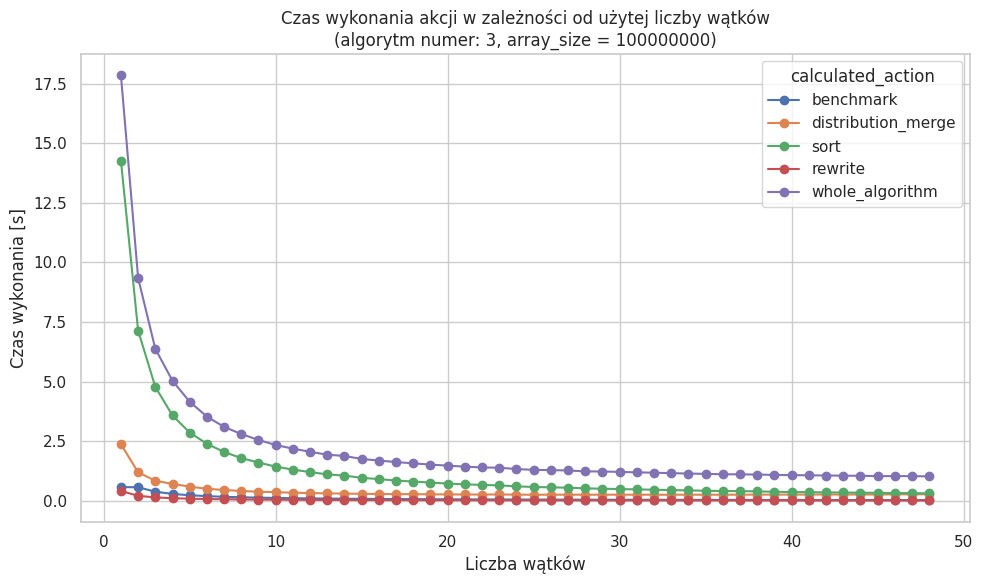

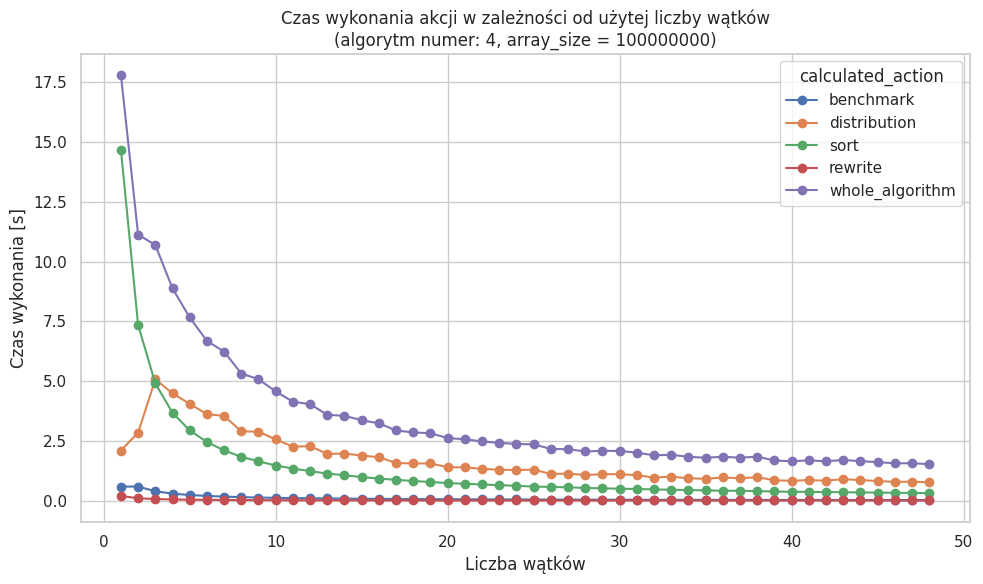

In [ ]:
wykres_dzialania_akcji(df1, numer=3)
wykres_dzialania_akcji(df2, numer=4)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def wykres_dzialania_akcji_comp(df1: pd.DataFrame, df2: pd.DataFrame, numer1: int, numer2: int):
    max_array_size1 = df1['array_size'].max()
    max_buckets_amount1 = df1['buckets_amount'].max()
    max_chunk_size1 = df1['chunk_size'].max()

    max_array_size2 = df2['array_size'].max()
    max_buckets_amount2 = df2['buckets_amount'].max()
    max_chunk_size2 = df2['chunk_size'].max()

    # Filtrowanie danych dla obu algorytmów
    filtered_df1 = df1[
        (df1["chunk_size"] == max_chunk_size1) &
        (df1["buckets_amount"] == max_buckets_amount1) &
        (df1["array_size"] == max_array_size1)
    ]

    filtered_df2 = df2[
        (df2["chunk_size"] == max_chunk_size2) &
        (df2["buckets_amount"] == max_buckets_amount2) &
        (df2["array_size"] == max_array_size2)
    ]

    # Sprawdzenie, czy są dane po filtrowaniu
    if filtered_df1.empty or filtered_df2.empty:
        print("Brak danych spełniających kryteria.")
        return

    # Wartości dla "calculated_action"
    actions = filtered_df1["calculated_action"].unique()

    for action in actions:
        if action in ["distribution_merge", "distribution"]:
          continue
        plt.figure(figsize=(10, 6))

        # Wykres dla pierwszego algorytmu
        subset1 = filtered_df1[filtered_df1["calculated_action"] == action]
        subset1 = subset1.sort_values("threads")
        plt.plot(subset1["threads"], subset1["execution_time_sec"], marker='o', label=f'{action} - Alg {numer1}')

        # Wykres dla drugiego algorytmu
        subset2 = filtered_df2[filtered_df2["calculated_action"] == action]
        subset2 = subset2.sort_values("threads")
        plt.plot(subset2["threads"], subset2["execution_time_sec"], marker='x', markersize=10, markeredgewidth=2, label=f'{action} - Alg {numer2}')

        # Ustawienia wykresu
        plt.title(f"Porównanie czasu wykonania akcji {action} w zależności od liczby wątków dla różnych algorytmów\n"
                  f"(algorytmy {numer1} i {numer2}, array_size = {max_array_size1})")
        plt.xlabel("Liczba wątków")
        plt.ylabel("Czas wykonania [s]")
        plt.legend(title="calculated_action")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


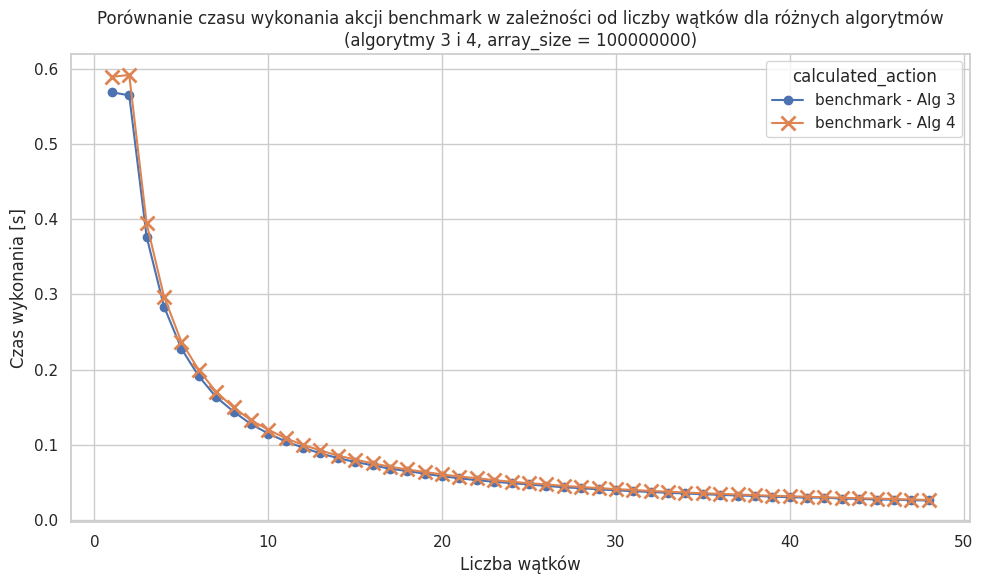

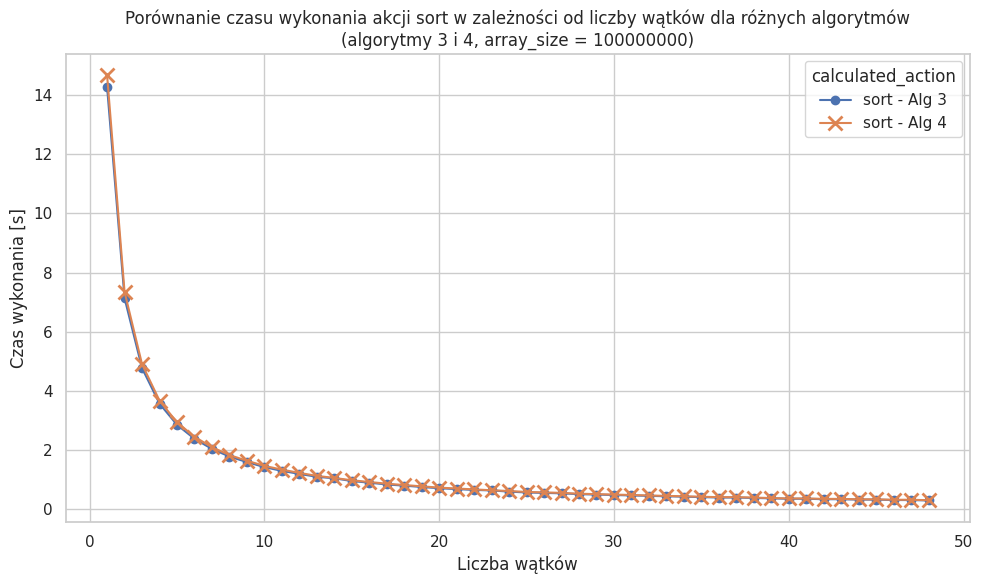

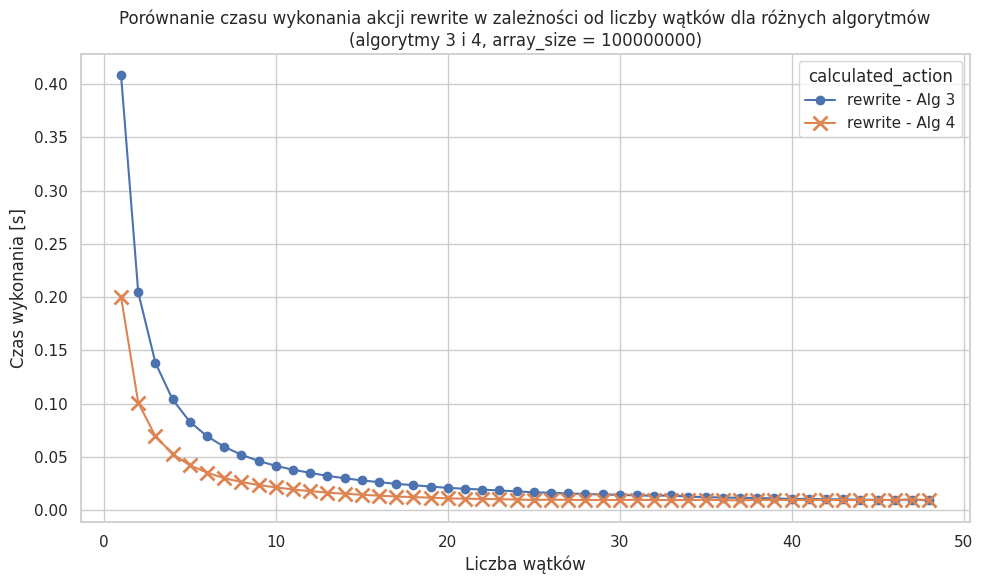

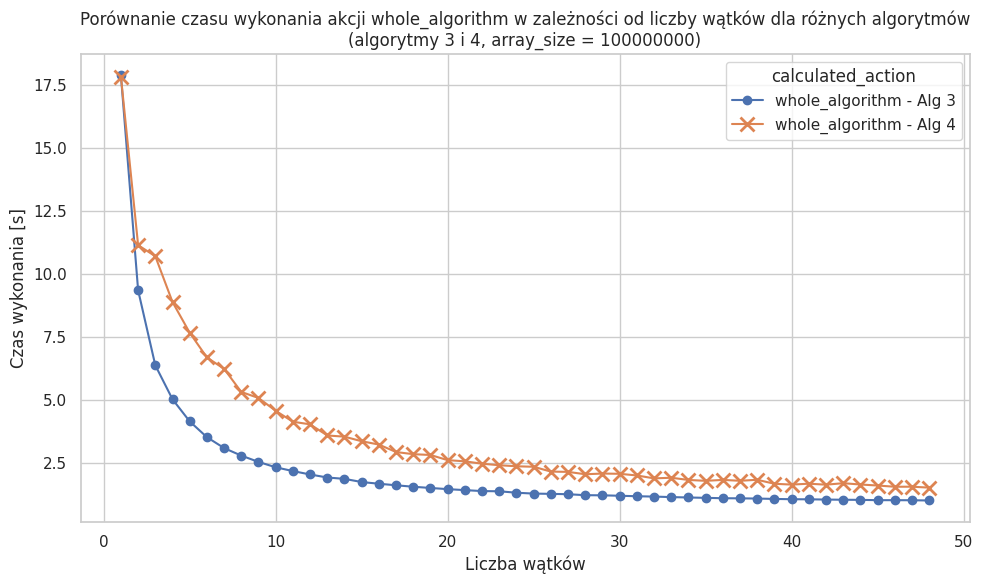

In [ ]:
wykres_dzialania_akcji_comp(df1, df2, numer1=3, numer2=4)

In [ ]:

def wykres_dzialania_akcji_distribution_comp(df1: pd.DataFrame, df2: pd.DataFrame, numer1: int, numer2: int):
    max_array_size1 = df1['array_size'].max()
    max_buckets_amount1 = df1['buckets_amount'].max()
    max_chunk_size1 = df1['chunk_size'].max()

    max_array_size2 = df2['array_size'].max()
    max_buckets_amount2 = df2['buckets_amount'].max()
    max_chunk_size2 = df2['chunk_size'].max()

    # Filtrowanie danych dla obu algorytmów
    filtered_df1 = df1[
        (df1["chunk_size"] == max_chunk_size1) &
        (df1["buckets_amount"] == max_buckets_amount1) &
        (df1["array_size"] == max_array_size1) &
        (df1["calculated_action"] == "distribution_merge")  # tylko dla df1
    ]

    filtered_df2 = df2[
        (df2["chunk_size"] == max_chunk_size2) &
        (df2["buckets_amount"] == max_buckets_amount2) &
        (df2["array_size"] == max_array_size2) &
        (df2["calculated_action"] == "distribution")  # tylko dla df2
    ]

    # Sprawdzenie, czy są dane po filtrowaniu
    if filtered_df1.empty or filtered_df2.empty:
        print("Brak danych spełniających kryteria.")
        return

    # Tworzenie wykresu
    plt.figure(figsize=(10, 6))

    # Wykres dla pierwszego algorytmu (distribution_merge)
    plt.plot(filtered_df1["threads"], filtered_df1["execution_time_sec"],
             marker='o', label=f'distribution_merge - Alg {numer1}', linestyle='-', markersize=8)

    # Wykres dla drugiego algorytmu (distribution)
    plt.plot(filtered_df2["threads"], filtered_df2["execution_time_sec"],
             marker='x', label=f'distribution - Alg {numer2}', linestyle='--', markersize=10, markeredgewidth=2)

    # Ustawienia wykresu
    plt.title(f"Porównanie czasu wykonania akcji distribution_merge i distribution w zależności od liczby wątków\n"
              f"(algorytmy {numer1} i {numer2}, array_size = {max_array_size1})")
    plt.xlabel("Liczba wątków")
    plt.ylabel("Czas wykonania [s]")
    plt.legend(title="calculated_action")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


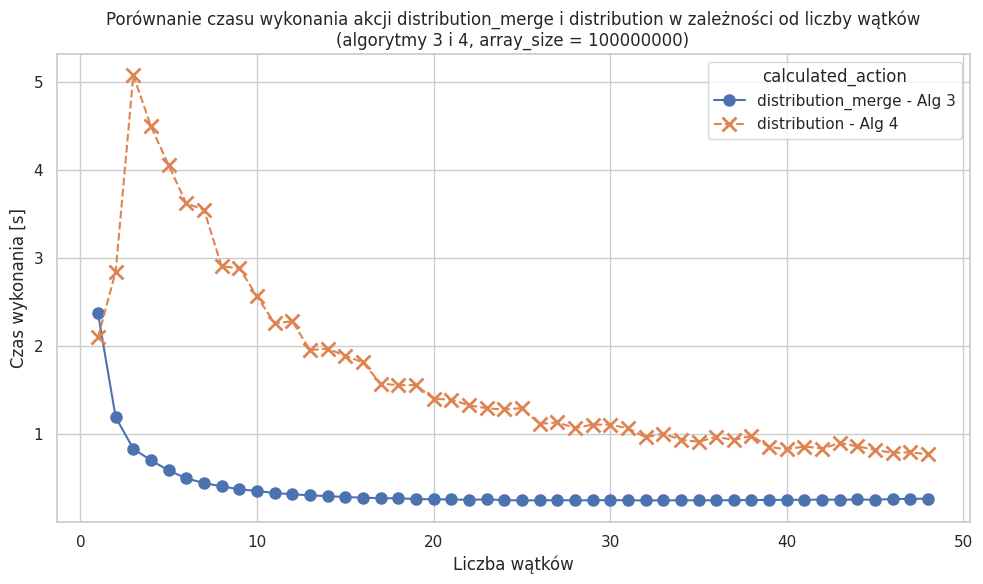

In [ ]:
wykres_dzialania_akcji_distribution_comp(df1, df2, numer1=3, numer2=4)


In [ ]:
def wykres_przyspieszenia(df: pd.DataFrame, numer: int):
    max_array_size = df['array_size'].max()
    max_buckets_amount = df['buckets_amount'].max()
    max_chunk_size = df['chunk_size'].max()
    filtered_df = df[
        (df["chunk_size"] == max_chunk_size) &
        (df["buckets_amount"] == max_buckets_amount) &
        (df["array_size"] == max_array_size)
    ]

    # Sprawdź, czy są dane po filtrowaniu
    if filtered_df.empty:
        print("Brak danych spełniających kryteria.")
        return

    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Przeiterowanie przez unikalne akcje
    for action in filtered_df["calculated_action"].unique():
        subset = filtered_df[filtered_df["calculated_action"] == action].sort_values("threads")

        # Znajdź czas bazowy (dla 1 wątku)
        base_time_row = subset[subset["threads"] == 1]
        if base_time_row.empty:
            continue  # Brak punktu odniesienia dla tej akcji
        base_time = base_time_row["execution_time_sec"].values[0]

        # Oblicz przyspieszenie (speedup)
        speedup = base_time / subset["execution_time_sec"]

        # Rysuj wykres dla akcji
        plt.plot(subset["threads"], speedup, marker='o', label=action)

    # Ustawienia wykresu
    plt.title(f"Przyspieszenie względem liczby wątków dla największego problemu\n(algorytm numer: {numer})")
    plt.xlabel("Liczba wątków")
    plt.ylabel("Przyspieszenie (Speedup)")
    plt.legend(title="Akcja")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


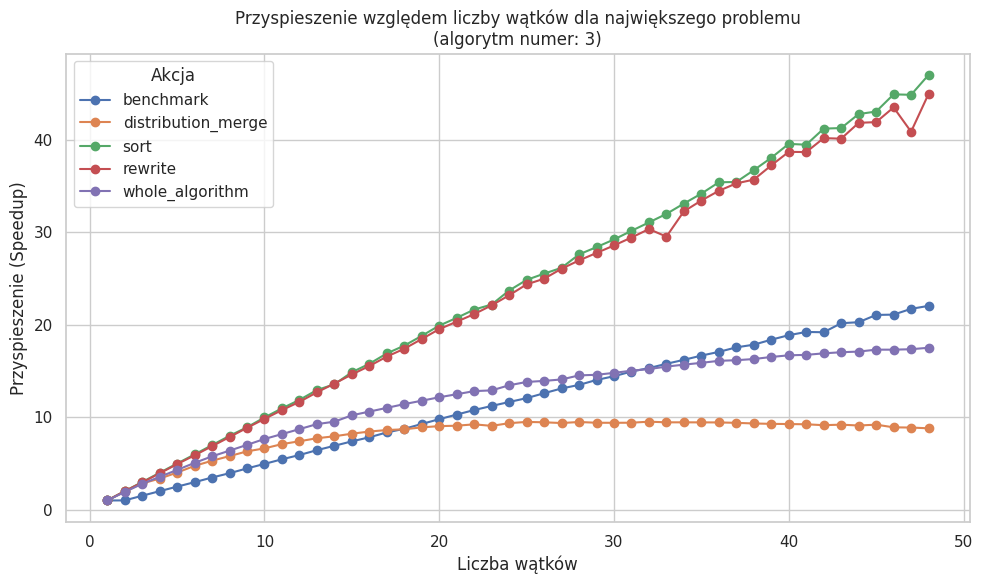

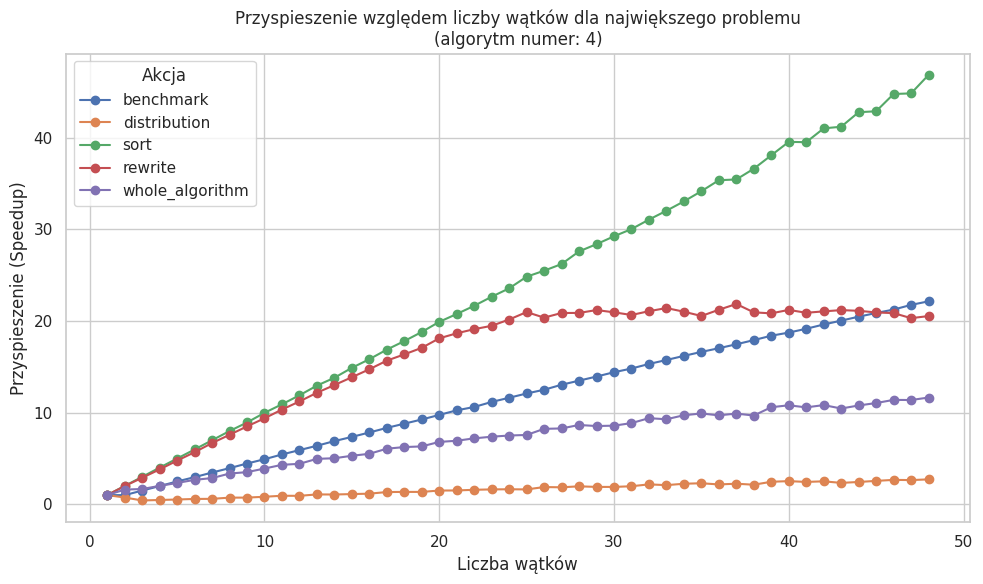

In [ ]:
wykres_przyspieszenia(df1, numer=3)
wykres_przyspieszenia(df2, numer=4)

In [ ]:
def wykres_przyspieszenia_comp(df1: pd.DataFrame, df2: pd.DataFrame, numer1: int, numer2: int):
    # Dla df1
    max_array_size1 = df1['array_size'].max()
    max_buckets_amount1 = df1['buckets_amount'].max()
    max_chunk_size1 = df1['chunk_size'].max()

    # Dla df2
    max_array_size2 = df2['array_size'].max()
    max_buckets_amount2 = df2['buckets_amount'].max()
    max_chunk_size2 = df2['chunk_size'].max()

    # Filtrowanie danych dla obu algorytmów
    filtered_df1 = df1[
        (df1["chunk_size"] == max_chunk_size1) &
        (df1["buckets_amount"] == max_buckets_amount1) &
        (df1["array_size"] == max_array_size1)
    ]

    filtered_df2 = df2[
        (df2["chunk_size"] == max_chunk_size2) &
        (df2["buckets_amount"] == max_buckets_amount2) &
        (df2["array_size"] == max_array_size2)
    ]

    # Sprawdzenie, czy są dane po filtrowaniu
    if filtered_df1.empty or filtered_df2.empty:
        print("Brak danych spełniających kryteria.")
        return

    # Wartości dla "calculated_action"
    actions = filtered_df1["calculated_action"].unique()

    # Przeiterowanie przez akcje
    for action in actions:
        # Pomijamy akcje "distribution_merge" i "distribution"
        if action in ["distribution_merge", "distribution"]:
            continue

        plt.figure(figsize=(10, 6))

        # Wykres dla pierwszego algorytmu (przyspieszenie dla df1)
        subset1 = filtered_df1[filtered_df1["calculated_action"] == action].sort_values("threads")

        # Znajdź czas bazowy (dla 1 wątku)
        base_time_row1 = subset1[subset1["threads"] == 1]
        if base_time_row1.empty:
            continue  # brak punktu odniesienia dla tej akcji
        base_time1 = base_time_row1["execution_time_sec"].values[0]

        # Oblicz przyspieszenie (speedup) dla df1
        speedup1 = base_time1 / subset1["execution_time_sec"]

        plt.plot(subset1["threads"], speedup1, marker='o', label=f'{action} - Alg {numer1}')

        # Wykres dla drugiego algorytmu (przyspieszenie dla df2)
        subset2 = filtered_df2[filtered_df2["calculated_action"] == action].sort_values("threads")

        # Znajdź czas bazowy (dla 1 wątku)
        base_time_row2 = subset2[subset2["threads"] == 1]
        if base_time_row2.empty:
            continue  # brak punktu odniesienia dla tej akcji
        base_time2 = base_time_row2["execution_time_sec"].values[0]

        # Oblicz przyspieszenie (speedup) dla df2
        speedup2 = base_time2 / subset2["execution_time_sec"]

        plt.plot(subset2["threads"], speedup2, marker='x', markersize=10, markeredgewidth=2, label=f'{action} - Alg {numer2}')

        # Ustawienia wykresu
        plt.title(f"Porównanie przyspieszenia {action} w zależności od liczby wątków dla różnych algorytmów\n"
                  f"(algorytmy {numer1} i {numer2}, array_size = {max_array_size1})")
        plt.xlabel("Liczba wątków")
        plt.ylabel("Przyspieszenie (Speedup)")
        plt.legend(title="calculated_action")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

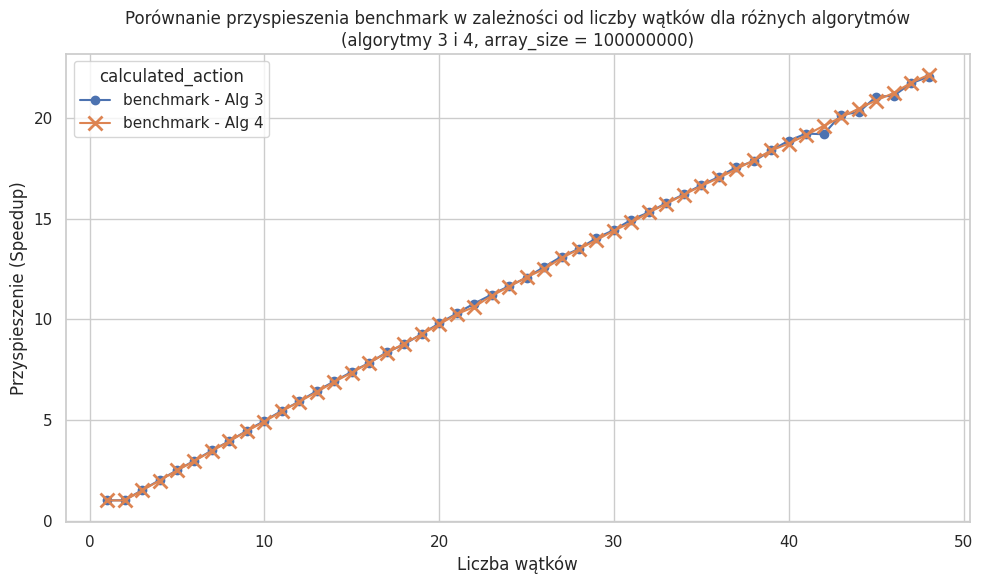

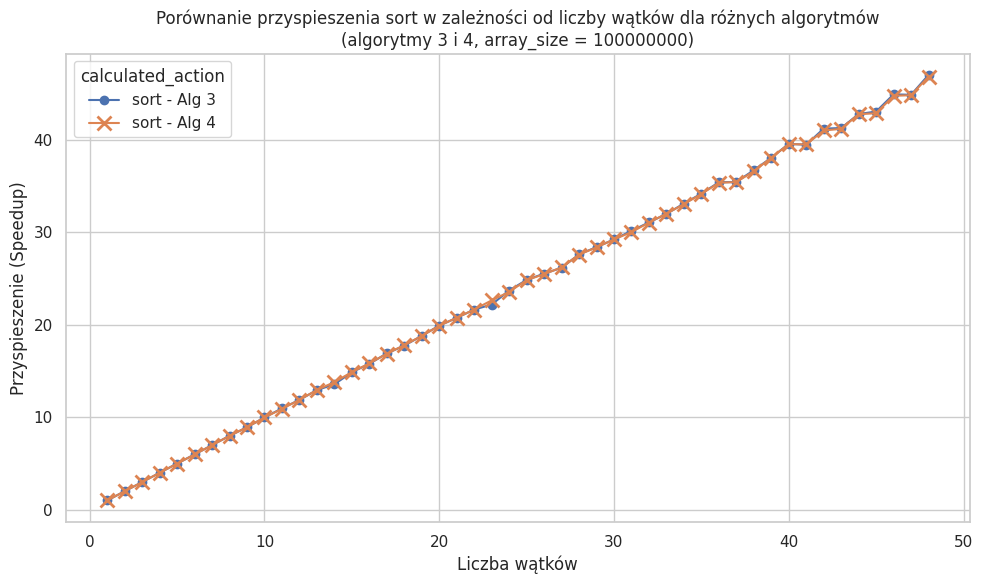

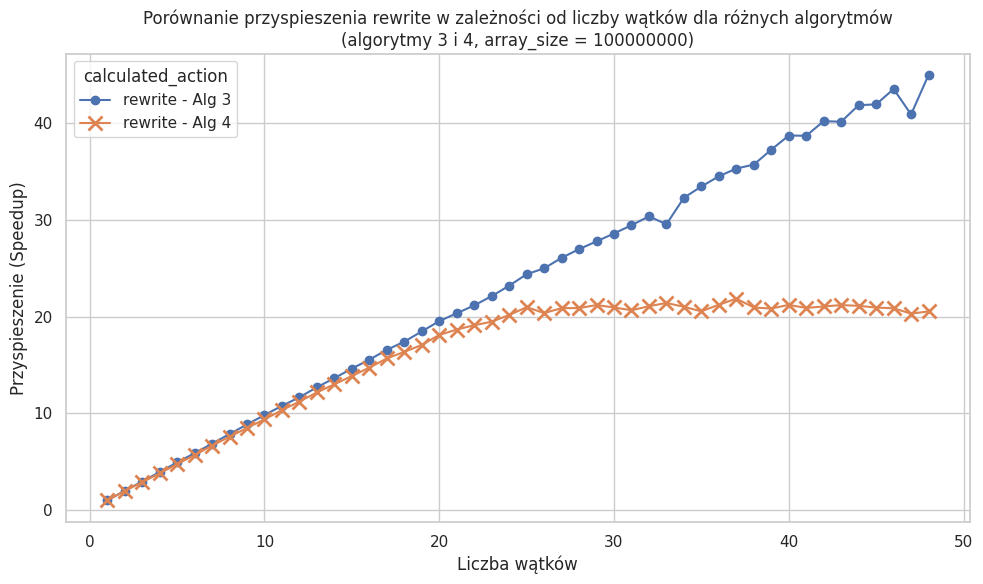

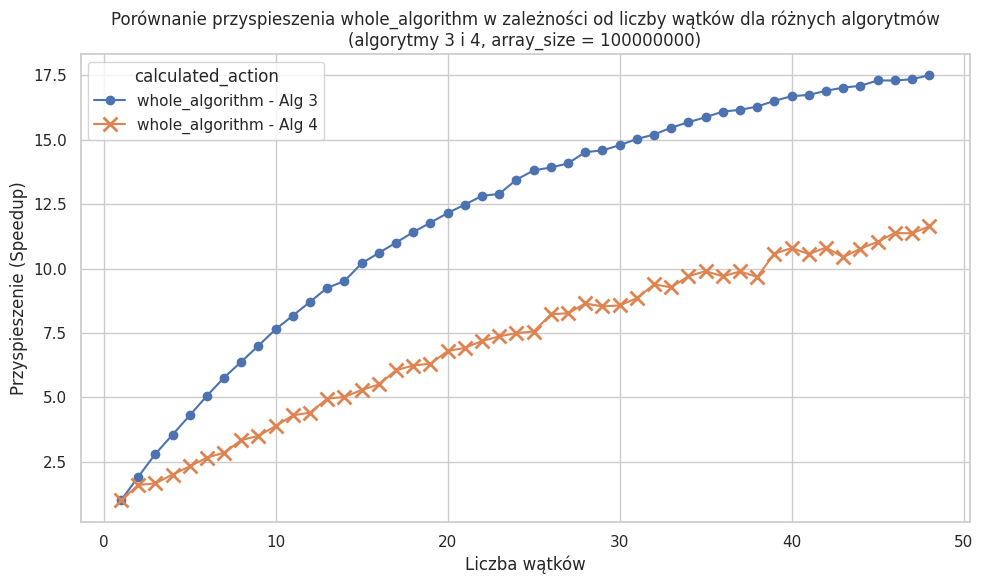

In [ ]:
wykres_przyspieszenia_comp(df1, df2, numer1=3, numer2=4)

In [ ]:
def wykres_przyspieszenia_distribution_comp(df1: pd.DataFrame, df2: pd.DataFrame, numer1: int, numer2: int):
    # Dla df1
    max_array_size1 = df1['array_size'].max()
    max_buckets_amount1 = df1['buckets_amount'].max()
    max_chunk_size1 = df1['chunk_size'].max()

    # Dla df2
    max_array_size2 = df2['array_size'].max()
    max_buckets_amount2 = df2['buckets_amount'].max()
    max_chunk_size2 = df2['chunk_size'].max()

    # Filtrowanie danych dla obu algorytmów
    filtered_df1 = df1[
        (df1["chunk_size"] == max_chunk_size1) &
        (df1["buckets_amount"] == max_buckets_amount1) &
        (df1["array_size"] == max_array_size1) &
        (df1["calculated_action"] == "distribution_merge")  # tylko dla df1
    ]

    filtered_df2 = df2[
        (df2["chunk_size"] == max_chunk_size2) &
        (df2["buckets_amount"] == max_buckets_amount2) &
        (df2["array_size"] == max_array_size2) &
        (df2["calculated_action"] == "distribution")  # tylko dla df2
    ]

    # Sprawdzenie, czy są dane po filtrowaniu
    if filtered_df1.empty or filtered_df2.empty:
        print("Brak danych spełniających kryteria.")
        return

    # Tworzenie wykresu
    plt.figure(figsize=(10, 6))

    # Wykres dla pierwszego algorytmu (distribution_merge)
    for action in filtered_df1["calculated_action"].unique():
        subset1 = filtered_df1[filtered_df1["calculated_action"] == action].sort_values("threads")

        # Znajdź czas bazowy (dla 1 wątku)
        base_time_row1 = subset1[subset1["threads"] == 1]
        if base_time_row1.empty:
            continue  # brak punktu odniesienia dla tej akcji
        base_time1 = base_time_row1["execution_time_sec"].values[0]

        # Oblicz przyspieszenie (speedup)
        speedup1 = base_time1 / subset1["execution_time_sec"]

        plt.plot(subset1["threads"], speedup1, marker='o', label=f'{action} - Alg {numer1}', linestyle='-', markersize=8)

    # Wykres dla drugiego algorytmu (distribution)
    for action in filtered_df2["calculated_action"].unique():
        subset2 = filtered_df2[filtered_df2["calculated_action"] == action].sort_values("threads")

        # Znajdź czas bazowy (dla 1 wątku)
        base_time_row2 = subset2[subset2["threads"] == 1]
        if base_time_row2.empty:
            continue  # brak punktu odniesienia dla tej akcji
        base_time2 = base_time_row2["execution_time_sec"].values[0]

        # Oblicz przyspieszenie (speedup)
        speedup2 = base_time2 / subset2["execution_time_sec"]

        plt.plot(subset2["threads"], speedup2, marker='x', label=f'{action} - Alg {numer2}', linestyle='--', markersize=10, markeredgewidth=2)

    # Ustawienia wykresu
    plt.title(f"Porównanie przyspieszenia akcji distribution_merge i distribution w zależności od liczby wątków\n"
              f"(algorytmy {numer1} i {numer2}, array_size = {max_array_size1})")
    plt.xlabel("Liczba wątków")
    plt.ylabel("Przyspieszenie (Speedup)")
    plt.legend(title="Akcja")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

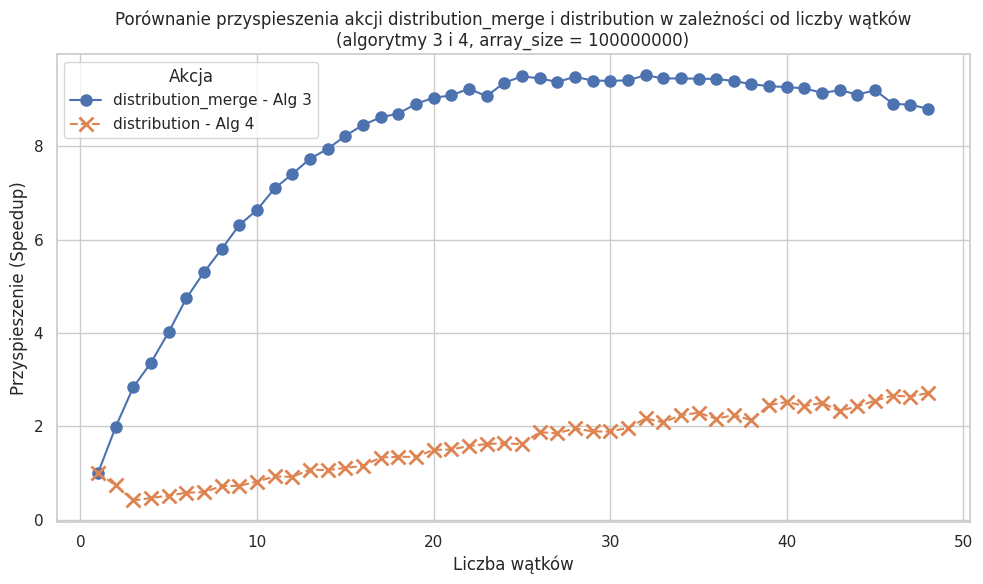

In [ ]:
wykres_przyspieszenia_distribution_comp(df1, df2, numer1=3, numer2=4)


Sekcja rozkładu kubełków

In [ ]:
def wczytaj_json(plik: str) -> pd.DataFrame:
    try:
        df = pd.read_json(plik)
        print(f"Plik {plik} został pomyślnie wczytany.")
        return df
    except Exception as e:
        print(f"Błąd podczas wczytywania pliku {plik}: {e}")
        return pd.DataFrame()


In [ ]:
df_buckets = wczytaj_json("zad3_buckets.json")
df_buckets.head()

Plik zad3_buckets.json został pomyślnie wczytany.


,buckets
0,"[9961, 10000, 9873, 10055, 9940, 9941, 9989, 1..."
1,"[20018, 20138, 19863, 20171, 19929, 19765, 199..."
2,"[30091, 30245, 29980, 30240, 30070, 29909, 299..."
3,"[40218, 40185, 39903, 40181, 40250, 39893, 399..."
4,"[50238, 50196, 50033, 50154, 50269, 49908, 498..."


In [ ]:
import numpy as np

def grouped_buckets_bar_plot(buckets, cut=False):
  group_size = 10
  num_groups = len(buckets) // group_size
  grouped = [np.mean(buckets[i*group_size:(i+1)*group_size]) for i in range(num_groups)]

  max_y = 10100
  min_y = 9800
  step = 50

  plt.figure(figsize=(12, 6))
  plt.bar(range(len(grouped)), grouped, color='skyblue')
  plt.title('Wykres słupkowy ilości liczb w kubełkach. \n(bucket_amount = 1000, kubełki grupowane po 10, dla czytelności wykresu)')
  plt.xlabel('Numer grupy (po 10 bucketów)')
  plt.ylabel('Średnia wartość grupy')
  plt.grid(axis='y')
  plt.show()

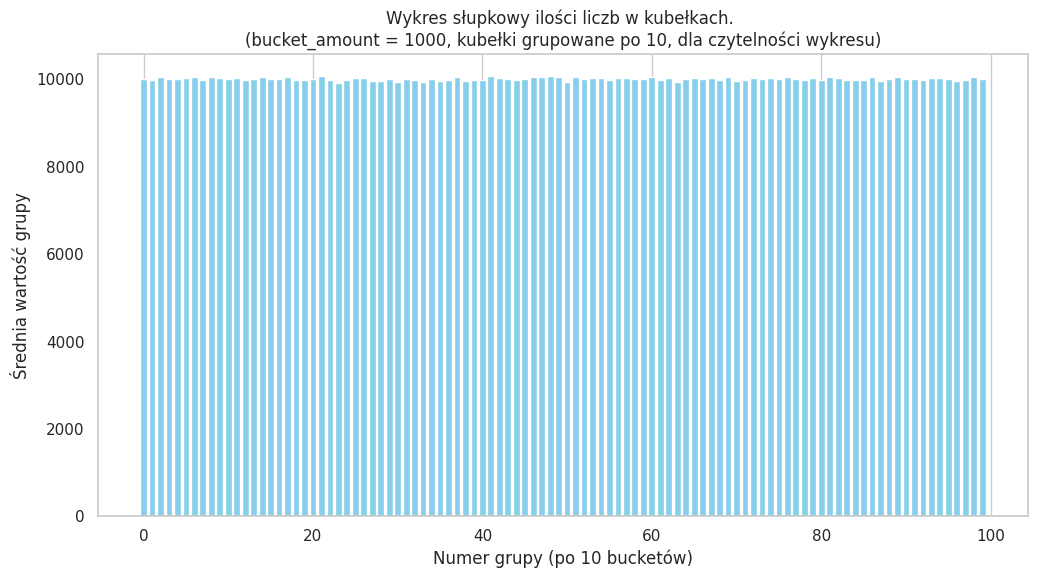

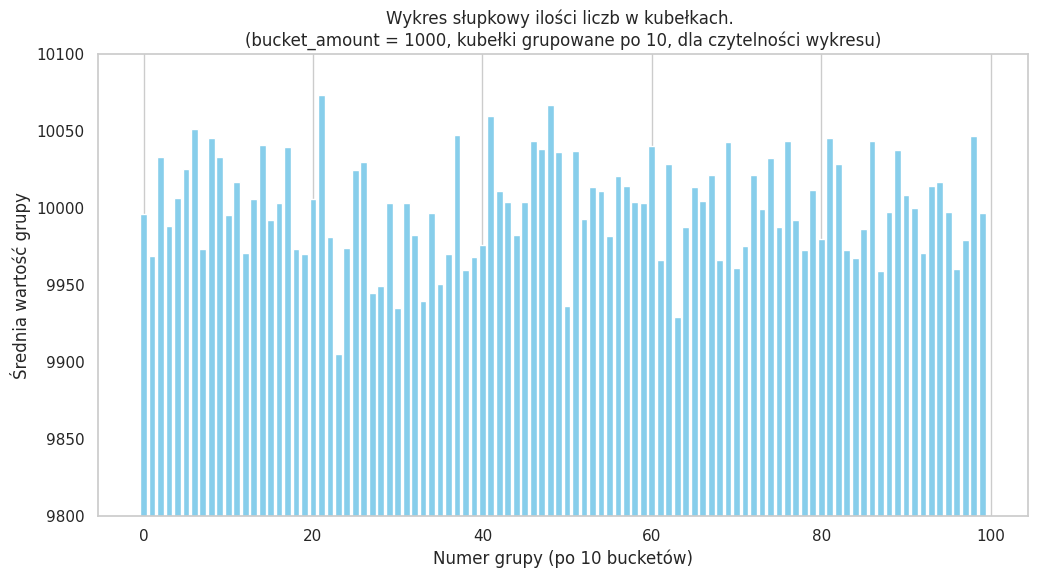

In [ ]:
buckets = df_buckets['buckets'][0]
grouped_buckets_bar_plot(buckets)
